# EDA of the roads network

In [1]:
# Imports
import pandas as pd
import pickle

# Print dataframes compact by displaying max 7 rows
pd.options.display.max_rows = 7

## Read the CSV as dataframe

In [2]:
roads = pd.read_csv('../data/interim/roads_file.csv', index_col=False, delimiter=';')

In [3]:
roads

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,91.36575,LRP145a,23.029416,91.365639,LRP146,23.026972,91.3655,LRP146a,23.024833,91.365528
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,Z8943,LRPS,22.426444,90.849472,LRPSa,22.426416,90.846833,LRP001,22.425444,90.839861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create dataframe by road

In [4]:
road = {}

In [5]:
sel_road = 'N1'
road[sel_road] = roads.loc[roads['road'] == sel_road]
road[sel_road]

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,91.36575,LRP145a,23.029416,91.365639,LRP146,23.026972,91.3655,LRP146a,23.024833,91.365528


In [6]:
def dataframe_per_road(single_row_df):
    # Create a series from the single-row dataframe
    series = single_row_df.iloc[0 , 1:]

    # Create an empty dataframe with 3 columns
    new_df = pd.DataFrame(columns=["name", "lat", "long"])

    # Fill that dataframe by splitting the series in sections of
    for i in range(len(series)//3):
        start = i*3
        end = (i+1)*3
        new_df.loc[i] = series.iloc[start:end].tolist()
    return new_df

In [7]:
dataframe_per_road(road[sel_road])

,name,lat,long
0,LRPS,23.706028,90.443333
1,LRPSa,23.702917,90.450417
2,LRPSb,23.702778,90.450472
...,...,...,...
330,LRP145a,23.029416,91.365639
331,LRP146,23.026972,91.365500
332,LRP146a,23.024833,91.365528


## Create dictionary of dataframes for all roads

In [8]:
# Create an empty dictionary for all roads
#road_df_dict = {}

# For each road, add a dataframe with the road segments to the dictionary
#for road in roads['road']:
#    single_row_df = roads.loc[roads['road'] == road]
#    road_df_dict[road] = dataframe_per_road(single_row_df)

In [9]:
# To save the dictionary for easier accesing later this code was run.

# with open('road_df_dict_pickle.pickle', 'wb') as handle:
#     pickle.dump(road_df_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# To open the pickle file to open the saved dictionary run this file.

with open('road_df_dict_pickle.pickle', 'rb') as handle:
    road_df_dict = pickle.load(handle)

In [11]:
road_df_dict['N1']

,name,long,lat
0,LRPS,23.706028,90.443333
1,LRPSa,23.702917,90.450417
2,LRPSb,23.702778,90.450472
...,...,...,...
330,LRP145a,23.029416,91.365639
331,LRP146,23.026972,91.365500
332,LRP146a,23.024833,91.365528


## Detect and replace outliers

### Ideas
 - Using a moving average [link](https://stackoverflow.com/questions/46964363/filtering-out-outliers-in-pandas-dataframe-with-rolling-median)
 - Classification and Regression Trees (Isolation Forest) in scikit-learn
 - Isolation Forest in PyCaret [link](https://towardsdatascience.com/time-series-anomaly-detection-with-pycaret-706a6e2b2427)
 - TODS: Automated Time-series Outlier Detection System [link](https://github.com/datamllab/tods)
 - Using Facebook Prophet [link](https://www.analyticsvidhya.com/blog/2021/12/anomaly-detection-model-using-facebook-prophet/)

Other ideas: [Anomaly Detection in Time Series](https://neptune.ai/blog/anomaly-detection-in-time-series)

In [12]:
window = 7 # Rolling windows length, 7 means looking 3 back and 3 forth
test_df = road_df_dict['N1']

In [13]:
# Add median and std values to datafr
for a in ['lat', 'long']:
    test_df[f'median_{a}']= test_df[a].rolling(window, center=True, min_periods=3).median()
    test_df[f'std_{a}'] = test_df[a].rolling(window, center=True, min_periods=3).std()
test_df

,name,long,lat,median_lat,std_lat,median_long,std_long
0,LRPS,23.706028,90.443333,90.450444,0.003878,23.702847,0.001742
1,LRPSa,23.702917,90.450417,90.450472,0.006155,23.702778,0.002915
2,LRPSb,23.702778,90.450472,90.451222,0.006930,23.702458,0.003308
...,...,...,...,...,...,...,...
330,LRP145a,23.029416,91.365639,91.365569,0.000110,23.032722,0.007299
331,LRP146,23.026972,91.365500,91.365611,0.000099,23.029416,0.006300
332,LRP146a,23.024833,91.365528,91.365583,0.000114,23.028194,0.004853


<AxesSubplot:>

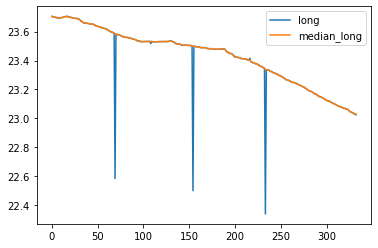

In [14]:
test_df[["long", "median_long"]].plot()

Values outlier values removed: 10


<AxesSubplot:>

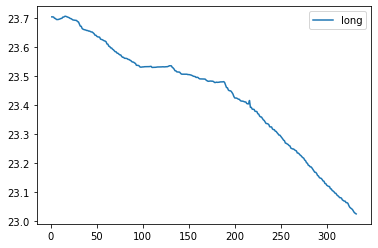

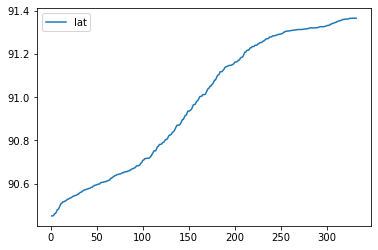

In [15]:
# Create a copy
test_df2 = test_df.copy()

# Set allowed standard deviation
max_std = 1.5

# Keep only the values that are withing the specified standard deviations of the rolling median
for a in ['lat', 'long']:
    test_df2 = test_df2[
        (test_df2[a] < test_df2[f'median_{a}']+max_std*test_df2[f'std_{a}']) &
        (test_df2[a] > test_df2[f'median_{a}']-max_std*test_df2[f'std_{a}'])
    ]

print(f'Values outlier values removed: {len(test_df.index)-len(test_df2.index)}')
test_df2[["long"]].plot()
test_df2[["lat"]].plot()

**TODO**
 - Write function to filter all roads
 - Write all roads back to a single `_roads.tcv` file
 - Test in Java application
 - Document

In [16]:
def filter_all(df_dict, window=7, max_std=2):
    ''' This function takes as input a dictionary containing dataframes, a window for the rolling median
        and a max std. deviation to select the road pieces.'''
    result = {}
    for r in roads['road']:
        road_df = df_dict[r]
        for a in ['lat', 'long']:
            # Add median and std values to dataframe
            road_df[f'median_{a}']= road_df[a].rolling(window, center=True, min_periods=2).median()
            road_df[f'std_{a}'] = road_df[a].rolling(window, center=True, min_periods=2).std()
        road_df2 = road_df.copy()

        # Keep only the values that are withing the specified standard deviations of the rolling median
        for a in ['lat', 'long']:
            road_df2 = road_df2[
                (road_df2[a] < road_df2[f'median_{a}']+max_std*road_df2[f'std_{a}']) &
                (road_df2[a] > road_df2[f'median_{a}']-max_std*road_df2[f'std_{a}'])
            ]

        # Replace the last value of each road to "LPRE"
        if len(road_df2.index) > 0:
            road_df2.loc[road_df2.index[0], 'name'] = "LPRS"
            road_df2.loc[road_df2.index[-1], 'name'] = "LPRE"

        result[r] = road_df2
    return result

In [17]:
check = filter_all(road_df_dict)
check['N1']

,name,long,lat,median_lat,std_lat,median_long,std_long
0,LPRS,23.706028,90.443333,90.450444,0.003878,23.702847,0.001742
1,LRPSa,23.702917,90.450417,90.450472,0.006155,23.702778,0.002915
2,LRPSb,23.702778,90.450472,90.451222,0.006930,23.702458,0.003308
...,...,...,...,...,...,...,...
330,LRP145a,23.029416,91.365639,91.365569,0.000110,23.032722,0.007299
331,LRP146,23.026972,91.365500,91.365611,0.000099,23.029416,0.006300
332,LPRE,23.024833,91.365528,91.365583,0.000114,23.028194,0.004853


In [18]:
def strip_dict(dic, cols=['median_long', 'median_lat', 'std_long', 'std_lat']):
    '''This function strips the dataframnes in the dictionaries of unnecessary columns.'''
    result = {}
    for r in dic:
        df = dic[r]
        df1 = df.drop(columns=cols)
        result[r] = df1
    return result

In [19]:
stripped = strip_dict(check)
stripped['N1']

,name,long,lat
0,LPRS,23.706028,90.443333
1,LRPSa,23.702917,90.450417
2,LRPSb,23.702778,90.450472
...,...,...,...
330,LRP145a,23.029416,91.365639
331,LRP146,23.026972,91.365500
332,LPRE,23.024833,91.365528


## Fuse dataframes and export to TCV file

In [20]:
# stripped.items()

In [21]:
# Create empty dictionary
series_to_add = {}

# Add a item to the dictionary for each road
for road, df in stripped.items():
    series_to_add[road] = df.stack()

# Create dataframe from dictionary, with each road being a column
new_df = pd.DataFrame.from_dict(series_to_add, orient="index")

# Drop multi-index level and transpose to get a row for each road
new_df = new_df.droplevel(level=0, axis=1)
new_df

,name,long,lat,name,long,lat,name,long,lat,name,...,lat,name,long,lat,name,long,lat,name,long,lat
N1,LPRS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,LRP001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N101,LPRS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,LRP001a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N102,LPRS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,LRP001,...,91.151306,LRP055c,23.832333,91.155528,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R602,NaN,NaN,NaN,LPRS,23.840000,89.530277,LRPSb,23.839722,89.530277,LRPSc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R603,NaN,NaN,NaN,LPRS,24.006667,89.226388,LRP001a,24.006667,89.224249,LRP002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R765,NaN,NaN,NaN,LPRS,23.058083,88.999444,LRP001a,23.058028,88.999444,LRP001b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Important note:** To finish the TCV file, open it in your text editor, and replace double tabs `		` with a single tab `	` until there aren't any places with more than 1 tab left.

In [22]:
# Export to TCV file
#df_T2 = df_T.fillna('')
#df_T2 = pd.DataFrame(df_T2, dtype='str')
#df_T2.apply(lambda x: x.str.rstrip('\t')).to_csv("../data/processed/_roads.tcv", sep="\t", index=True, line_terminator="\n")

new_df.to_csv("../data/processed/_roads.tcv", sep="\t", index=True, line_terminator="\n")